In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import models as md
#sns.set()

## Response angle for noiseless, stationary model

In [2]:
def stationary_response_angle(vt, el, rm, rho_null, c_scale, c_rho, m, b):
    resp_angle = (vt - el + rho_null)/(c_scale * m * (rm - c_rho)) - b/m
    return resp_angle

## Response angle for noisy, stationary model

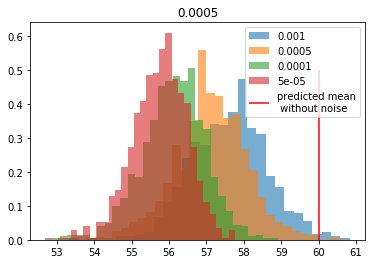

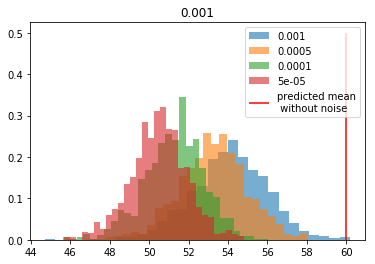

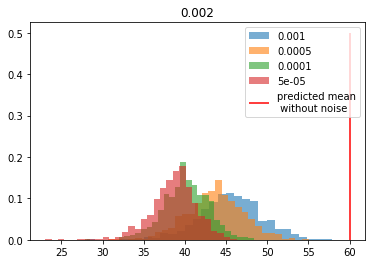

In [3]:
params = {'tau_m': 0.023,
          'e_l': -0.079,
          'r_m': 10*1e6,
          'v_t': -0.061,
          'init_vm_std': 0.000,
          'vt_std': 0.000,
          'rho_null': 0,
          'rho_null_std': 1,
          'tau_inh': 0.001,
          'rho_scale': 9.0*1e6,
          'exc_scale': 30,
          'dt': 0.001,
          'total_time': 5,
          'init_period': 0,
          'noise_std_exc': 0*1e-3,
          'noise_std_inh': 0*1e-3,
          'cutoff_angle': 180,
          'm': 1,
          'b': 0,
          'lv_min': 0.1,
          'lv_max': 1.2,
          'l_min': 10,
          'l_max': 25,
          'init_distance': 50}

std_vals = [0.0005, 0.001, 0.002]
dt_vals = [0.001, 0.0005, 0.0001, 0.00005]
mean_resp_angle = np.zeros((len(std_vals), len(dt_vals)))
for vt_idx, vt_std in enumerate(std_vals):
    plt.figure()
    params['vt_std'] = vt_std
    for dt_idx, dt_val in enumerate(dt_vals):
        params['dt'] = dt_val
        nruns = 1000
        rstims = np.zeros(nruns)
        rdists = np.zeros(nruns)
        reaction_times = np.zeros(nruns)
        speeds = np.zeros(nruns)
        for i in np.arange(nruns):
            rstims[i], rdists[i], reaction_times[i], lv, stim_size, speeds[i], resp_in_t_to_coll = md.calc_response_fully_stationary(params)

        analytical_resp_angle = stationary_response_angle(params['v_t'], params['e_l'], params['r_m'], params['rho_null']*1e-3,
                                                           params['exc_scale']*1e-11, params['rho_scale'], params['m'],
                                                           params['b'])
        mean_resp_angle[vt_idx, dt_idx] = np.mean(rstims)

        plt.hist(rstims, bins=30, label=str(dt_val), density=True, alpha=0.6)
    
    plt.vlines(analytical_resp_angle, 0, 0.5, 'r', label='predicted mean\n without noise')
    plt.title(str(vt_std))
    plt.legend()

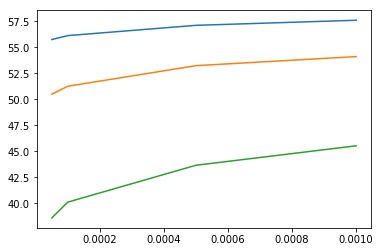

In [4]:
plt.plot(dt_vals, mean_resp_angle.T)

## Effect of dt on membrane noise

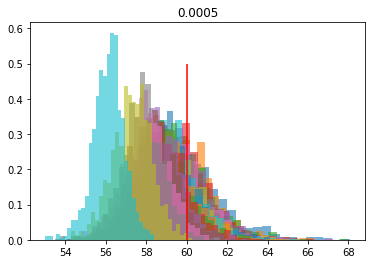

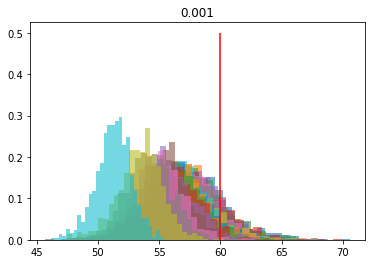

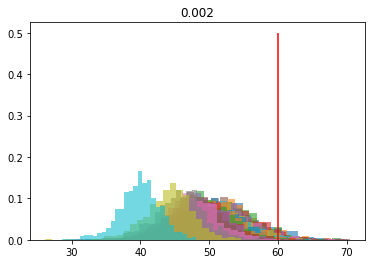

In [19]:
params = {'tau_m': 0.023,
          'e_l': -0.079,
          'r_m': 10*1e6,
          'v_t': -0.061,
          'init_vm_std': 0.000,
          'vt_std': 0.000,
          'rho_null': 0,
          'rho_null_std': 1,
          'tau_inh': 0.001,
          'rho_scale': 9.0*1e6,
          'exc_scale': 30,
          'dt': 0.001,
          'total_time': 5,
          'init_period': 0,
          'noise_std_exc': 0*1e-3,
          'noise_std_inh': 0*1e-3,
          'cutoff_angle': 180,
          'm': 1,
          'b': 0,
          'lv_min': 0.1,
          'lv_max': 1.2,
          'l_min': 10,
          'l_max': 25,
          'init_distance': 50}

std_vals = [0.0005, 0.001, 0.002]
dt_vals = [0.001, 0.0005, 0.0001, 0.00005]
dt_vals = np.linspace(0.01, 0.0001, num=20)
mean_resp_angle = np.zeros((len(std_vals), len(dt_vals)))
var_resp_angle = np.zeros((len(std_vals), len(dt_vals)))
for exc_idx, exc_std in enumerate(std_vals):
    plt.figure()
    params['noise_std_exc'] = exc_std
    for dt_idx, dt_val in enumerate(dt_vals):
        params['dt'] = dt_val
        nruns = 1000
        rstims = np.zeros(nruns)
        rdists = np.zeros(nruns)
        reaction_times = np.zeros(nruns)
        speeds = np.zeros(nruns)
        for i in np.arange(nruns):
            rstims[i], rdists[i], reaction_times[i], lv, stim_size, speeds[i], resp_in_t_to_coll = md.calc_response_fully_stationary(params)

        analytical_resp_angle = stationary_response_angle(params['v_t'], params['e_l'], params['r_m'], params['rho_null']*1e-3,
                                                           params['exc_scale']*1e-11, params['rho_scale'], params['m'],
                                                           params['b'])
        mean_resp_angle[exc_idx, dt_idx] = np.mean(rstims)
        var_resp_angle[exc_idx, dt_idx] = np.var(rstims)

        plt.hist(rstims, bins=30, label=str(dt_val), density=True, alpha=0.6)
    
    plt.vlines(analytical_resp_angle, 0, 0.5, 'r', label='predicted mean\n without noise')
    plt.title(str(exc_std))
    #plt.legend()

Text(0.5,1,'std of response angles')

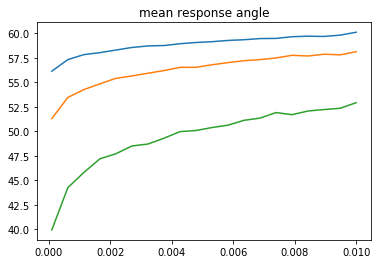

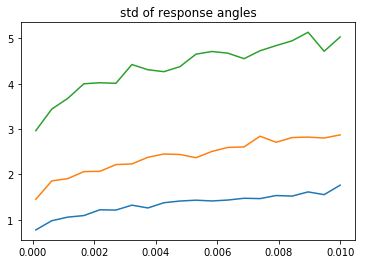

In [20]:
plt.figure()
plt.plot(dt_vals, mean_resp_angle.T)
plt.title('mean response angle')

plt.figure()
plt.plot(dt_vals, np.sqrt(var_resp_angle.T))
plt.title('std of response angles')

In [14]:
std_factor = 1/(params['exc_scale']*1e-11*params['m']*(params['r_m'] - params['rho_scale']))
estimated_std = params['noise_std_exc'] * std_factor
estimated_std

6.666666666666667

In [18]:
0.002*std_factor

6.666666666666667

In [21]:
from scipy.stats import norm

In [23]:
from scipy import integrate
x2 = lambda x: x**2
print(integrate.quad(x2, 0, 4))

print(4**3 / 3.)  # analytical result

(21.333333333333336, 2.368475785867001e-13)
21.333333333333332


In [120]:
def threshold_passing_rate(t, params, theta):
    t_idx = int(t/params['dt'])
    input_current = params['m']*theta[t_idx] + params['b']
    v = params['e_l'] + input_current*1e-11* params['exc_scale']*(params['r_m'] - params['rho_scale']) - params['rho_null']
    rate = norm.cdf(v, loc=params['v_t'], scale=params['vt_std'])#/ params['dt']
    return rate

In [121]:
params = {'tau_m': 0.023,
          'e_l': -0.079,
          'r_m': 10*1e6,
          'v_t': -0.061,
          'init_vm_std': 0.000,
          'vt_std': 0.002,
          'rho_null': 0,
          'rho_null_std': 1,
          'tau_inh': 0.001,
          'rho_scale': 9.0*1e6,
          'exc_scale': 30,
          'dt': 0.0001,
          'total_time': 5,
          'init_period': 0,
          'noise_std_exc': 0*1e-3,
          'noise_std_inh': 0*1e-3,
          'cutoff_angle': 180,
          'm': 2,
          'b': 0,
          'lv_min': 0.1,
          'lv_max': 1.2,
          'l_min': 10,
          'l_max': 25,
          'init_distance': 50}

lv = np.random.rand() * (params['lv_max'] - params['lv_min']) + params['lv_min']
# sample stimulus sizes (L) uniformly between l_min and l_max
# stim_size = np.random.rand()*(params['l_max']-params['l_min']) + params['l_min']
stim_size = np.random.randint(params['l_min'], params['l_max'])
speed = 1 / (lv / stim_size)
t, stims, tstims, dists, t_to_coll, tstim_to_coll = md.transform_stim(stim_size, speed, params['total_time'],
                                                                          params['dt'], params['m'], params['b'],
                                                                          params['init_period'], params['cutoff_angle'],
                                                                          params['init_distance'])

t_min = 0.001
t_max = 5
t_samples = np.linspace(t_min, t_max, num=50)
first_passages = np.zeros(len(t_samples))
for t_idx, t_sample in enumerate(t_samples):
    mean_first_passage  = integrate.quad(threshold_passing_rate, t_min, t_sample, args=(params, stims))
    first_passages[t_idx] = mean_first_passage[0]/(t_sample - t_min)

/home/warkentin/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:42: RuntimeWarning: invalid value encountered in double_scalars
/home/warkentin/.local/lib/python3.6/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)
/home/warkentin/.local/lib/python3.6/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, Integra

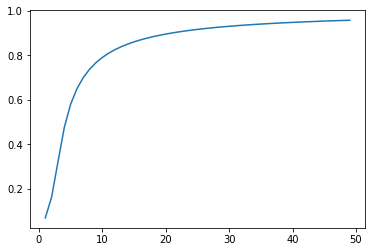

In [122]:
plt.plot(first_passages)

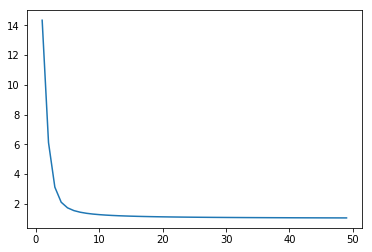

In [124]:
plt.plot(1/first_passages)

In [129]:
first_passage_times = 1/first_passages
mfpt_idc = first_passage_times/params['dt']
#mean_resp_angle = np.mean(stims[])
#stims[mfpt_idx]

In [140]:
stims[mfpt_idc[5:].astype(int)]

array([180., 180., 180., 180., 180., 180., 180., 180., 180., 180., 180.,
       180., 180., 180., 180., 180., 180., 180., 180., 180., 180., 180.,
       180., 180., 180., 180., 180., 180., 180., 180., 180., 180., 180.,
       180., 180., 180., 180., 180., 180., 180., 180., 180., 180., 180.,
       180.])

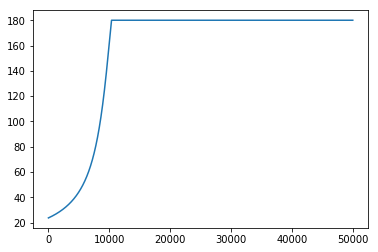

In [127]:
plt.plot(stims)

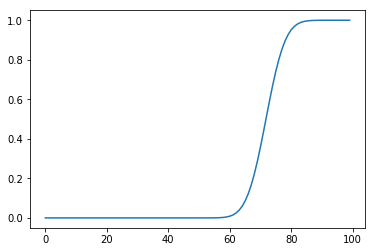

In [46]:
a = np.linspace(-0.090, -0.050, num=100)
plt.plot(norm.cdf(a, loc=params['v_t'], scale=params['vt_std']))

In [47]:
threshold_passing_rate(0.01, params, stims)

2.580773236480643e-19

IndexError: index 50000 is out of bounds for axis 0 with size 50000

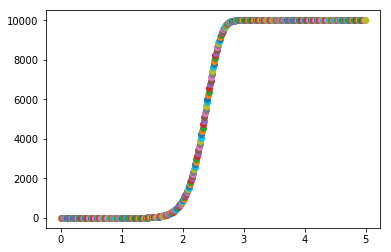

In [118]:
x = np.linspace(t_min, t_max, num=500)
for xpoint in x:
    rate = threshold_passing_rate(xpoint, params, stims)
    plt.plot(xpoint, rate, '.', ms=12)

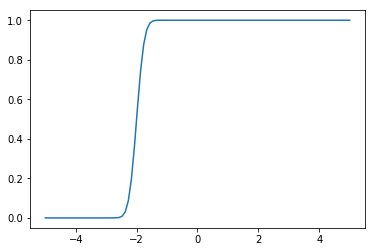

In [105]:
x = np.linspace(-5, 5, num=100)
normcdf = norm.cdf(x, loc=-2, scale=0.2)
plt.plot(x, normcdf)

## Using constant thresholds but sampled from a normal distribution across trials:

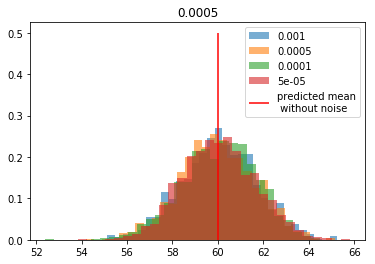

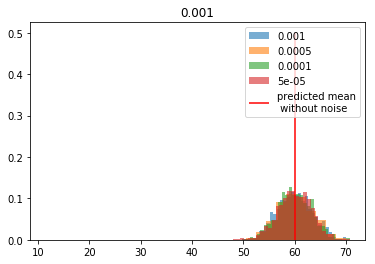

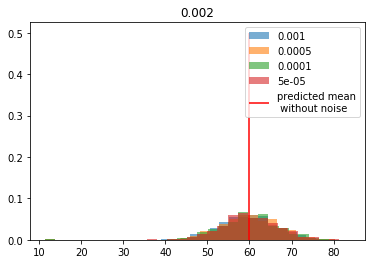

In [7]:
params = {'tau_m': 0.023,
          'e_l': -0.079,
          'r_m': 10*1e6,
          'v_t': -0.061,
          'init_vm_std': 0.000,
          'vt_std': 0.000,
          'rho_null': 0,
          'rho_null_std': 1,
          'tau_inh': 0.001,
          'rho_scale': 9.0*1e6,
          'exc_scale': 30,
          'dt': 0.001,
          'total_time': 5,
          'init_period': 0,
          'noise_std_exc': 0*1e-3,
          'noise_std_inh': 0*1e-3,
          'cutoff_angle': 180,
          'm': 1,
          'b': 0,
          'lv_min': 0.1,
          'lv_max': 1.2,
          'l_min': 10,
          'l_max': 25,
          'init_distance': 50}

std_vals = [0.0005, 0.001, 0.002]
dt_vals = [0.001, 0.0005, 0.0001, 0.00005]
mean_resp_angle = np.zeros((len(std_vals), len(dt_vals)))
for vt_idx, vt_std in enumerate(std_vals):
    plt.figure()
    for dt_idx, dt_val in enumerate(dt_vals):
        params['dt'] = dt_val
        nruns = 1000
        rstims = np.zeros(nruns)
        rdists = np.zeros(nruns)
        reaction_times = np.zeros(nruns)
        speeds = np.zeros(nruns)
        run_vt_vals = np.random.normal(loc=-0.061, scale=vt_std, size=nruns)
        for i in np.arange(nruns):
            params['v_t'] = run_vt_vals[i]
            rstims[i], rdists[i], reaction_times[i], lv, stim_size, speeds[i], resp_in_t_to_coll = md.calc_response_fully_stationary(params)

        analytical_resp_angle = stationary_response_angle(-0.061, params['e_l'], params['r_m'], params['rho_null']*1e-3,
                                                           params['exc_scale']*1e-11, params['rho_scale'], params['m'],
                                                           params['b'])
        mean_resp_angle[vt_idx, dt_idx] = np.mean(rstims)

        plt.hist(rstims, bins=30, label=str(dt_val), density=True, alpha=0.6)
    
    plt.vlines(analytical_resp_angle, 0, 0.5, 'r', label='predicted mean\n without noise')
    plt.title(str(vt_std))
    plt.legend()

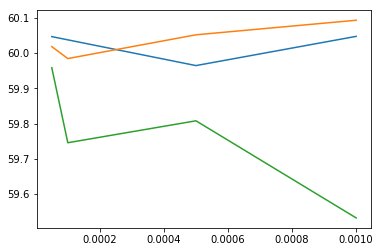

In [8]:
plt.plot(dt_vals, mean_resp_angle.T)